# Redes neuronales: TabNet

## 1.- Descripción

Este algoritmo se basa en una arquitectura de red neuronal profunda diseñada específicamente para manejar datos tabulares

In [ ]:
https://medium.com/%40kdk199604/tabnet-a-deep-learning-breakthrough-for-tabular-data-bcd39c47a81c

https://cloud.google.com/vertex-ai/docs/tabular-data/tabular-workflows/tabnet-train?hl=es-419


## 2.- Implementación


In [1]:
%pip install pytorch-tabnet
%pip install torch



   ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
   ---------------------------------------- 44.5/44.5 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/204.2 MB 4.1 MB/s eta 0:00:50
   ---------------------------------------- 0.2/204.2 MB 2.4 MB/s eta 0:01:26
   ---------------------------------------- 0.4/204.2 MB 2.9 MB/s eta 0:01:11
   ---------------------------------------- 0.4/204.2 MB 2.9 MB/s eta 0:01:11
   ---------------------------------------- 0.6/204.2 MB 2.4 MB/s eta 0:01:27
   ---------------------------------------- 0.6/204.2 MB 2.4 MB/s eta 0:01:25
   ---------------------------------------- 0.8/204.2 MB 2.7 MB/s eta 0:01:17
   ---------------------------------------- 1.0/204.2 MB 2.6 MB/s eta 0:01:20
   ---------------------------------------- 1.2/204.2 MB 2.9 MB/s eta 0:01:10
   ----

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from pytorch_tabnet.tab_model import TabNetClassifier
import warnings

### 2.1.- Modelo 1:

In [13]:
# === 1. Cargar datos ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
# Convertir fecha y extraer componentes
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month

# Eliminar cualquier columna datetime
df = df.select_dtypes(exclude=['datetime'])


🔁 Fold 1

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


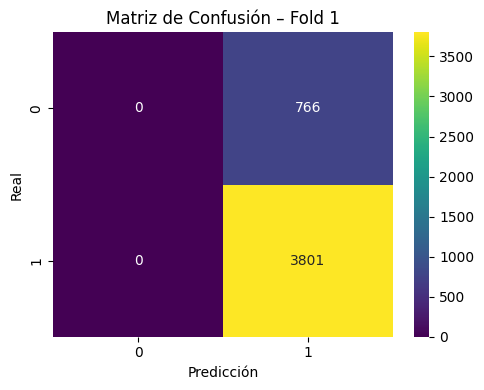


🔁 Fold 2

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83052


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 2:
              precision    recall  f1-score   support

           0       0.10      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.47      0.50      0.45      4567
weighted avg       0.71      0.83      0.76      4567

[[   1  765]
 [   9 3792]]


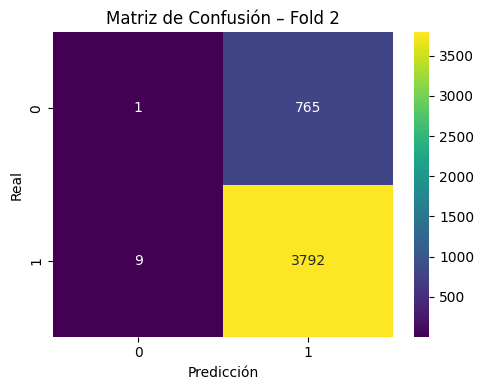


🔁 Fold 3

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


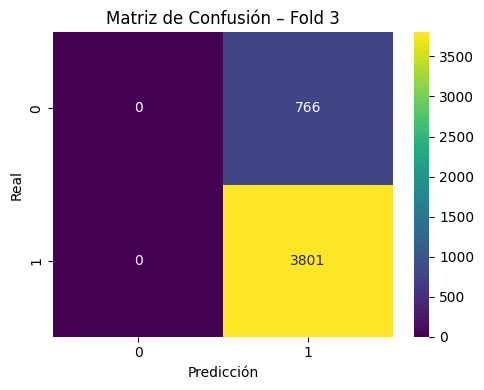


🔁 Fold 4

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


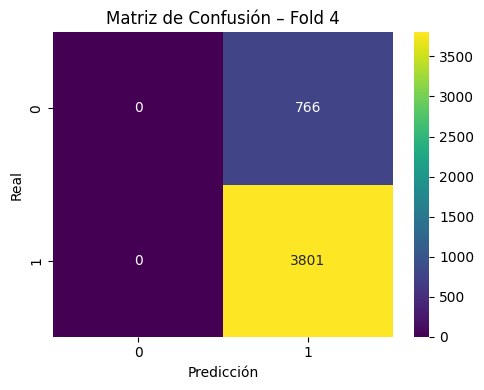


🔁 Fold 5

Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_accuracy = 0.83206


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 5:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       767
           1       0.83      1.00      0.91      3800

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  767]
 [   0 3800]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


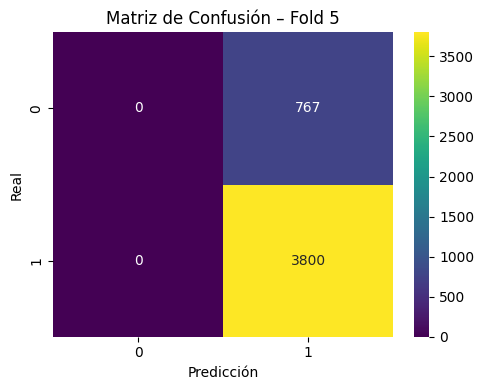

In [14]:
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. Ajuste GLOBAL de LabelEncoder antes del split ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# === 4. Escalado global de numéricas (está bien porque usamos CV) ===
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# === 5. Índices y dimensiones de embeddings ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. Validación cruzada ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold}")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = y[train_idx]
    y_val = y[val_idx]

    # === 7. Modelo TabNet ===
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128
    )

    # === 8. Evaluación ===
    y_pred = model.predict(X_val)
    print(f"🔹 Resultados Fold {fold}:")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    # === 9. Visualización ===
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


### 2.2.- Modelo 2:


🔁 Fold 1

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_accuracy = 0.46727


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 1 (Modelo 2 – class_weights):
              precision    recall  f1-score   support

           0       0.21      0.78      0.33       766
           1       0.90      0.40      0.56      3801

    accuracy                           0.47      4567
   macro avg       0.55      0.59      0.44      4567
weighted avg       0.78      0.47      0.52      4567

[[ 596  170]
 [2263 1538]]


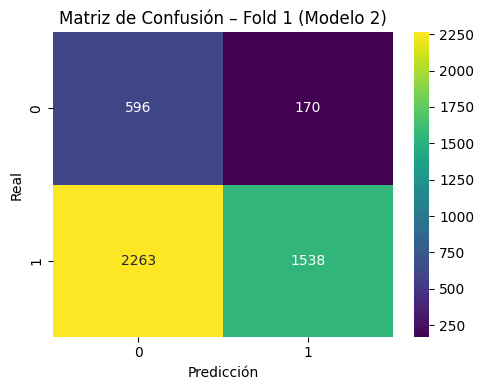


🔁 Fold 2

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.6085


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 2 (Modelo 2 – class_weights):
              precision    recall  f1-score   support

           0       0.18      0.39      0.25       766
           1       0.84      0.65      0.73      3801

    accuracy                           0.61      4567
   macro avg       0.51      0.52      0.49      4567
weighted avg       0.73      0.61      0.65      4567

[[ 300  466]
 [1322 2479]]


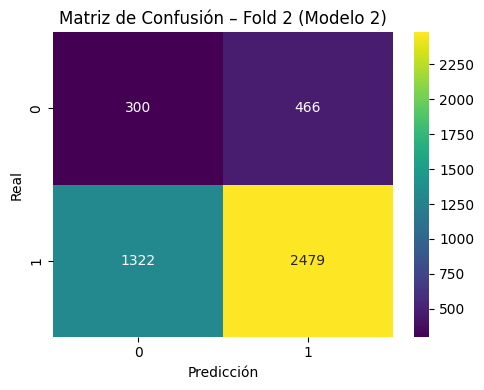


🔁 Fold 3

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_accuracy = 0.77053


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 3 (Modelo 2 – class_weights):
              precision    recall  f1-score   support

           0       0.29      0.25      0.27       766
           1       0.85      0.88      0.86      3801

    accuracy                           0.77      4567
   macro avg       0.57      0.56      0.57      4567
weighted avg       0.76      0.77      0.76      4567

[[ 192  574]
 [ 474 3327]]


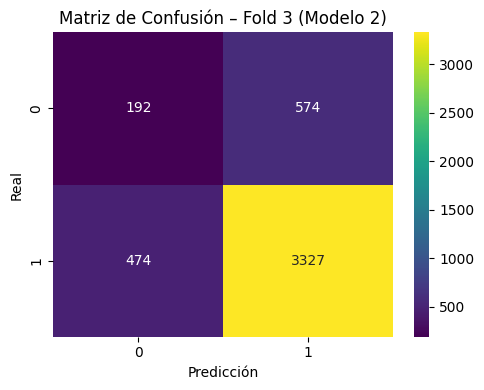


🔁 Fold 4

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 4 (Modelo 2 – class_weights):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


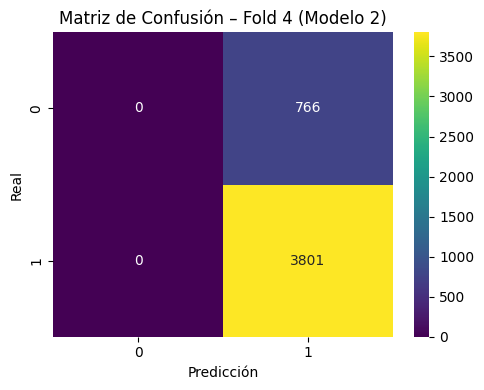


🔁 Fold 5

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.82133


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 Resultados Fold 5 (Modelo 2 – class_weights):
              precision    recall  f1-score   support

           0       0.29      0.04      0.08       767
           1       0.84      0.98      0.90      3800

    accuracy                           0.82      4567
   macro avg       0.56      0.51      0.49      4567
weighted avg       0.74      0.82      0.76      4567

[[  34  733]
 [  83 3717]]


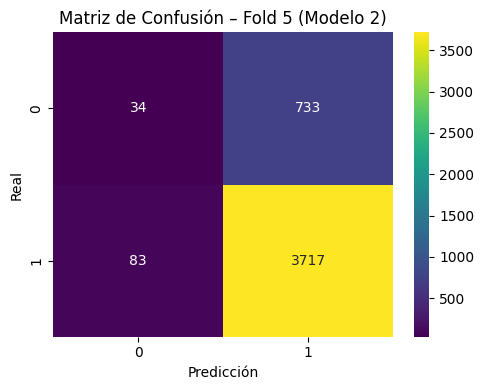

In [16]:
# === 1. Cargar y limpiar ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])  # Asegurarse de que no queden Timestamps

# === 2. Variables ===
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. LabelEncoder global ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# === 4. Escalar numéricas ===
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# === 5. Índices y dimensiones de embeddings ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. Validación cruzada con class weights ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold}")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = y[train_idx]
    y_val = y[val_idx]

    # === 6.1. Calcular class weights para este fold ===
    weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weights = {i: weights_array[i] for i in range(len(weights_array))}

    # === 7. Modelo TabNet con class weights ===
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        weights=weights
    )

    # === 8. Evaluación ===
    y_pred = model.predict(X_val)
    print(f"🔹 Resultados Fold {fold} (Modelo 2 – class_weights):")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    # === 9. Visualización ===
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 2)")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


### 2.3.- Modelo 3


🔁 Fold 1 (Modelo 3 – umbral 0.4)

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


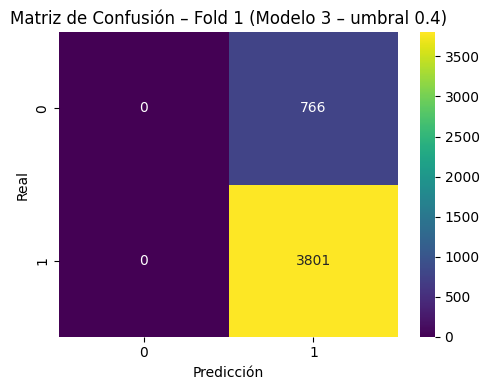


🔁 Fold 2 (Modelo 3 – umbral 0.4)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83052


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   8 3793]]


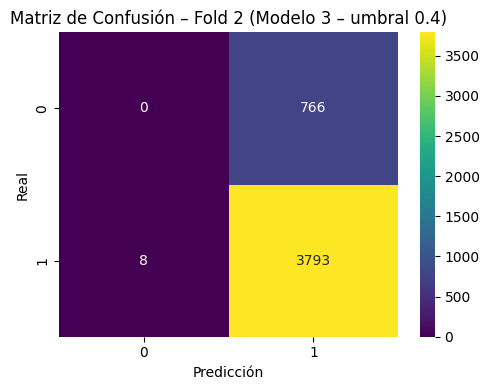


🔁 Fold 3 (Modelo 3 – umbral 0.4)

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


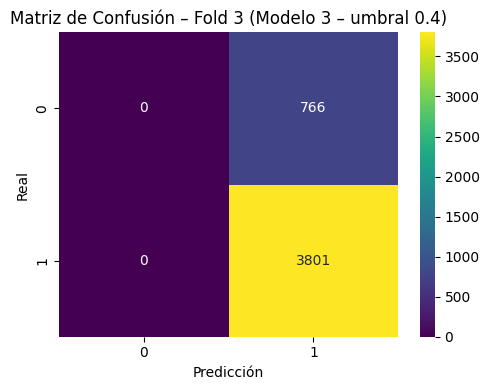


🔁 Fold 4 (Modelo 3 – umbral 0.4)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


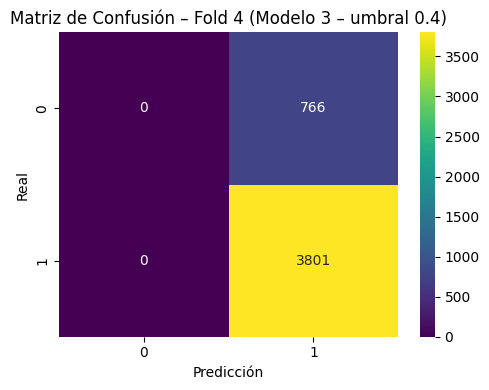


🔁 Fold 5 (Modelo 3 – umbral 0.4)

Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_accuracy = 0.83206


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       767
           1       0.83      1.00      0.91      3800

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  767]
 [   0 3800]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


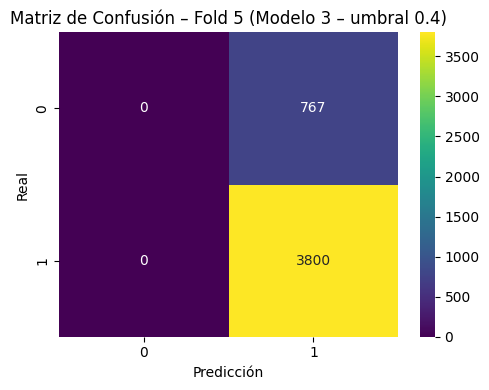

In [19]:
# === 1. Cargar y limpiar ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

# === 2. Variables ===
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. LabelEncoder global ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# === 4. Escalar numéricas ===
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# === 5. Índices y dimensiones de embeddings ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. Validación cruzada con ajuste de umbral ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
UMBRAL = 0.4

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 3 – umbral {UMBRAL})")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = y[train_idx]
    y_val = y[val_idx]

    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128
    )

    # === 7. Evaluación con umbral ajustado ===
    probas = model.predict_proba(X_val)[:, 1]
    y_pred = (probas >= UMBRAL).astype(int)

    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 3 – umbral {UMBRAL})")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

### 2.4.- Modelo 4: 


🔁 Fold 1 (Modelo 4 – class_weights + umbral 0.4)

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_accuracy = 0.46727


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.21      0.56      0.30       766
           1       0.86      0.57      0.68      3801

    accuracy                           0.57      4567
   macro avg       0.53      0.56      0.49      4567
weighted avg       0.75      0.57      0.62      4567

[[ 426  340]
 [1645 2156]]


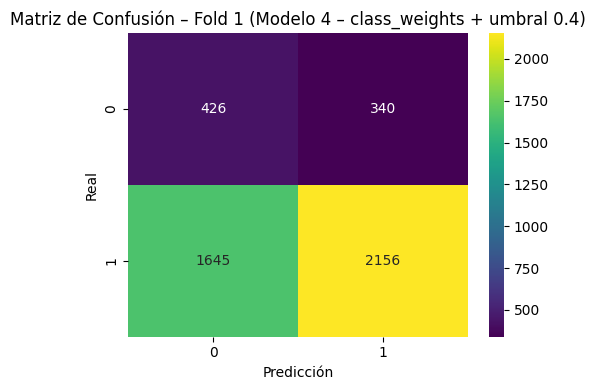


🔁 Fold 2 (Modelo 4 – class_weights + umbral 0.4)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.6085


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.23      0.16      0.19       766
           1       0.84      0.89      0.86      3801

    accuracy                           0.77      4567
   macro avg       0.53      0.53      0.53      4567
weighted avg       0.74      0.77      0.75      4567

[[ 124  642]
 [ 423 3378]]


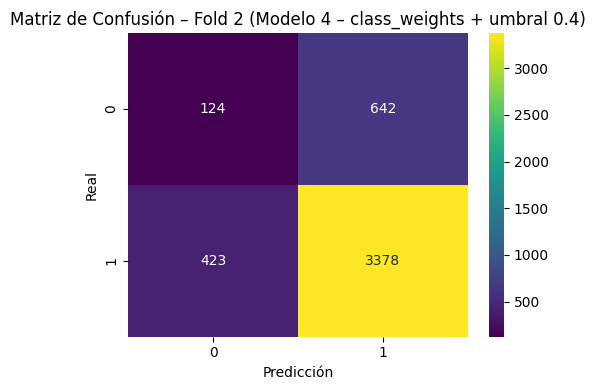


🔁 Fold 3 (Modelo 4 – class_weights + umbral 0.4)

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_accuracy = 0.77053


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.30      0.11      0.17       766
           1       0.84      0.94      0.89      3801

    accuracy                           0.81      4567
   macro avg       0.57      0.53      0.53      4567
weighted avg       0.75      0.81      0.77      4567

[[  88  678]
 [ 210 3591]]


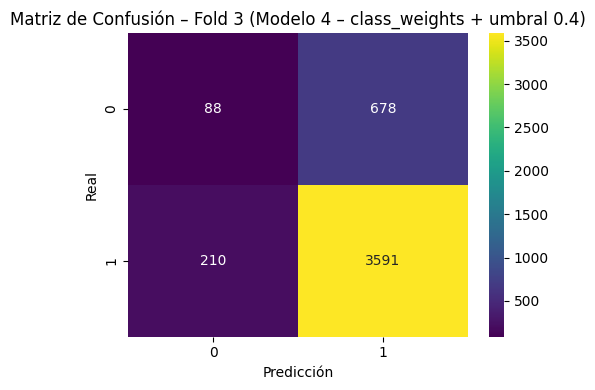


🔁 Fold 4 (Modelo 4 – class_weights + umbral 0.4)

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


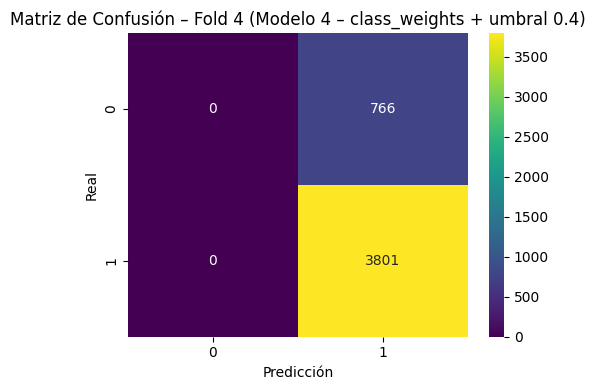


🔁 Fold 5 (Modelo 4 – class_weights + umbral 0.4)

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.82133


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.27      0.03      0.06       767
           1       0.83      0.98      0.90      3800

    accuracy                           0.82      4567
   macro avg       0.55      0.51      0.48      4567
weighted avg       0.74      0.82      0.76      4567

[[  25  742]
 [  67 3733]]


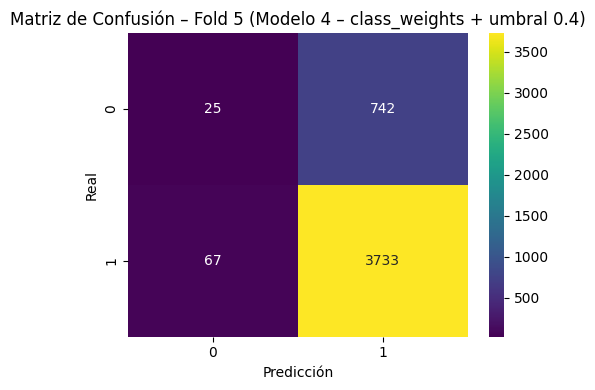

In [20]:
# === 1. Cargar y limpiar ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

# === 2. Variables ===
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. LabelEncoder global ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# === 4. Escalar numéricas ===
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# === 5. Índices y dimensiones de embeddings ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. Validación cruzada con class_weights + ajuste de umbral ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
UMBRAL = 0.4

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 4 – class_weights + umbral {UMBRAL})")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = y[train_idx]
    y_val = y[val_idx]

    # Calcular class weights
    weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weights = {i: weights_array[i] for i in range(len(weights_array))}

    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        weights=weights
    )

    # === 7. Evaluación con umbral ajustado ===
    probas = model.predict_proba(X_val)[:, 1]
    y_pred = (probas >= UMBRAL).astype(int)

    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 4 – class_weights + umbral {UMBRAL})")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

### 2.5.- Modelo 5

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings


🔁 Fold 1 (Modelo 5 – oversampling + class_weights + umbral 0.4)

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.83009


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [  10 3791]]


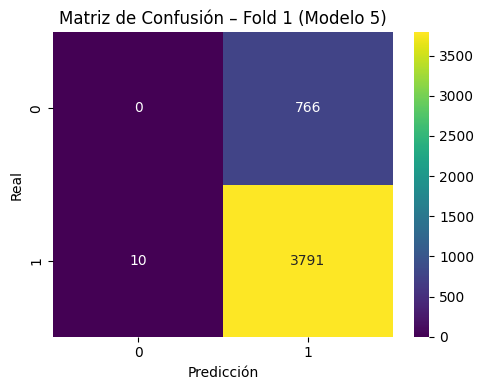


🔁 Fold 2 (Modelo 5 – oversampling + class_weights + umbral 0.4)

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.60653


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.30      0.30      0.30       766
           1       0.86      0.86      0.86      3801

    accuracy                           0.77      4567
   macro avg       0.58      0.58      0.58      4567
weighted avg       0.77      0.77      0.77      4567

[[ 226  540]
 [ 515 3286]]


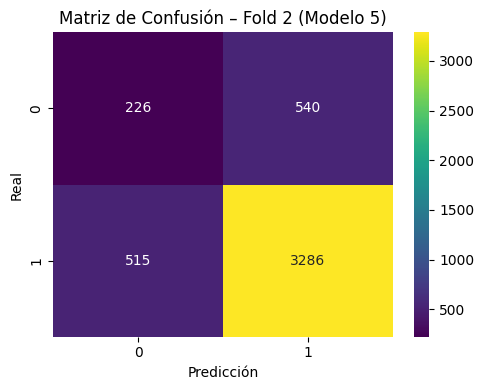


🔁 Fold 3 (Modelo 5 – oversampling + class_weights + umbral 0.4)

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.71425


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.34      0.39      0.36       766
           1       0.87      0.85      0.86      3801

    accuracy                           0.77      4567
   macro avg       0.61      0.62      0.61      4567
weighted avg       0.78      0.77      0.78      4567

[[ 298  468]
 [ 585 3216]]


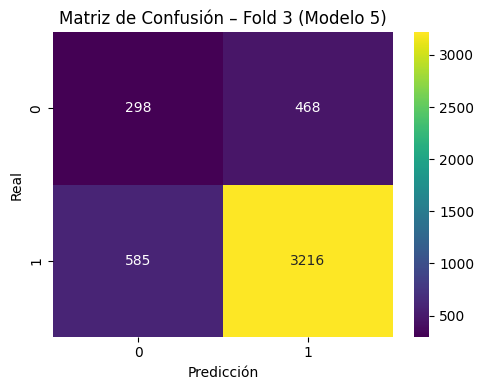


🔁 Fold 4 (Modelo 5 – oversampling + class_weights + umbral 0.4)

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.79505


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.30      0.13      0.18       766
           1       0.84      0.94      0.89      3801

    accuracy                           0.80      4567
   macro avg       0.57      0.53      0.53      4567
weighted avg       0.75      0.80      0.77      4567

[[  97  669]
 [ 231 3570]]


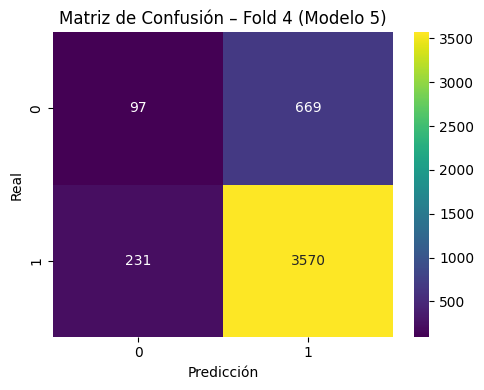


🔁 Fold 5 (Modelo 5 – oversampling + class_weights + umbral 0.4)

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_accuracy = 0.69805


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.34      0.33      0.34       767
           1       0.87      0.87      0.87      3800

    accuracy                           0.78      4567
   macro avg       0.60      0.60      0.60      4567
weighted avg       0.78      0.78      0.78      4567

[[ 255  512]
 [ 495 3305]]


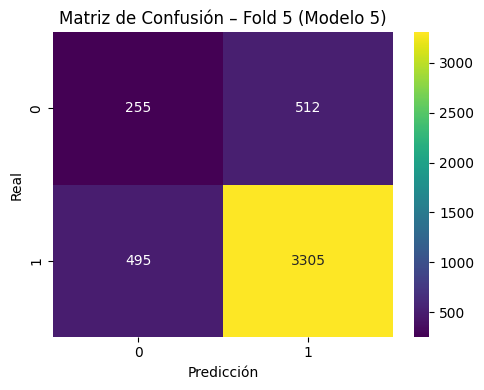

In [22]:
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

# === 2. Variables ===
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']
y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. LabelEncoder global ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# === 4. Escalar numéricas ===
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# === 5. Embeddings info ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. Cross-validation con oversampling + weights + umbral ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
UMBRAL = 0.4

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 5 – oversampling + class_weights + umbral {UMBRAL})")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = y[train_idx]
    y_val = y[val_idx]

    # === 6.1. Oversampling ===
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    # === 6.2. Class weights sobre el conjunto balanceado ===
    weights_array = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
    weights = {i: weights_array[i] for i in range(len(weights_array))}

    # === 7. TabNet ===
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train_resampled, y_train_resampled,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        weights=weights
    )

    # === 8. Evaluación con umbral ===
    probas = model.predict_proba(X_val)[:, 1]
    y_pred = (probas >= UMBRAL).astype(int)

    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 5)")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

### Modelo 6.- 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn.functional as F
import warnings



🔁 Fold 1 (Modelo 6 – Focal Loss)

Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_accuracy = 0.50449


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.13      0.28      0.18       766
           1       0.81      0.63      0.71      3801

    accuracy                           0.57      4567
   macro avg       0.47      0.46      0.45      4567
weighted avg       0.70      0.57      0.62      4567

[[ 217  549]
 [1399 2402]]


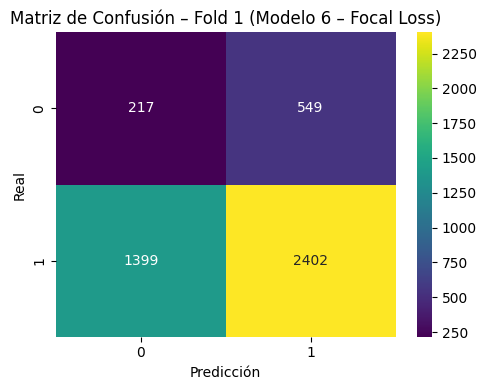


🔁 Fold 2 (Modelo 6 – Focal Loss)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83228


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


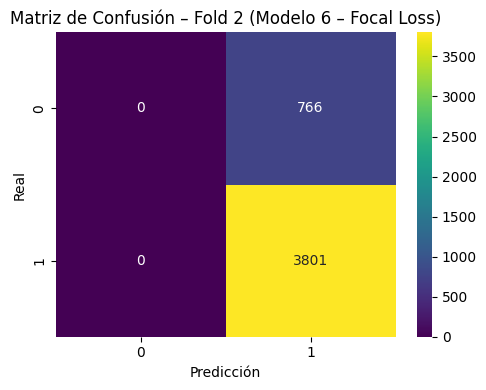


🔁 Fold 3 (Modelo 6 – Focal Loss)

Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_accuracy = 0.83206


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  766]
 [   0 3801]]


c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaeg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


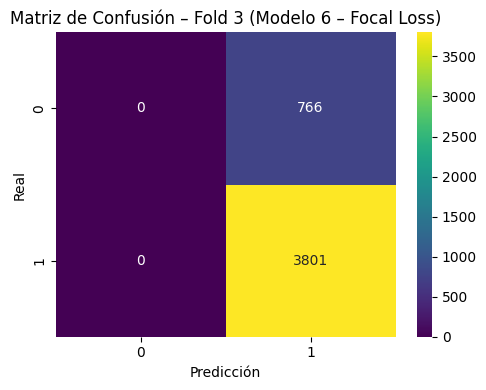


🔁 Fold 4 (Modelo 6 – Focal Loss)

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.83052


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.14      0.00      0.00       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.49      0.50      0.46      4567
weighted avg       0.72      0.83      0.76      4567

[[   1  765]
 [   6 3795]]


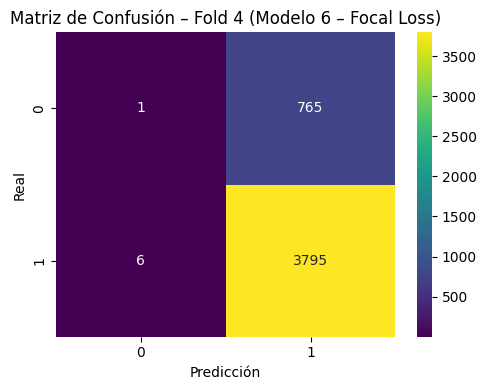


🔁 Fold 5 (Modelo 6 – Focal Loss)

Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_accuracy = 0.82855


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       767
           1       0.83      1.00      0.91      3800

    accuracy                           0.83      4567
   macro avg       0.42      0.50      0.45      4567
weighted avg       0.69      0.83      0.76      4567

[[   0  767]
 [   1 3799]]


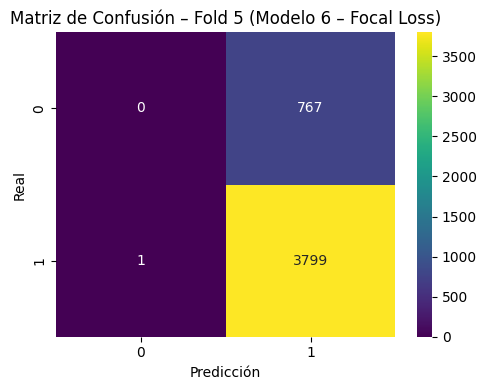

In [33]:
# === 1. Focal Loss ===
def focal_loss(y_true, y_pred, alpha=None, gamma=2.0):
    """
    Focal loss compatible con PyTorch y TabNet.
    y_true: tensor [batch] o [batch, 1]
    y_pred: tensor [batch, n_classes]
    """
    if len(y_true.shape) > 1:
        y_true = y_true.squeeze()

    y_true = y_true.long()
    y_pred = y_pred.float()

    log_probs = F.log_softmax(y_pred, dim=-1)
    probs = torch.exp(log_probs)

    ce_loss = F.nll_loss(log_probs, y_true, weight=alpha, reduction='none')
    pt = probs[range(len(y_true)), y_true]
    focal_term = (1 - pt) ** gamma

    return (focal_term * ce_loss).mean()

# === 2. Cargar y procesar datos ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. Codificación y escalado ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 4. Configuración ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
UMBRAL = 0.4
alpha = torch.tensor([0.75, 0.25])  # Más peso a la clase 0

# === 5. Cross-validation ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 6 – Focal Loss)")

    X_train = X.iloc[train_idx].values
    X_val = X.iloc[val_idx].values
    y_train = np.ravel(y[train_idx])
    y_val = np.ravel(y[val_idx])

    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        loss_fn=lambda y_pred, y_true: focal_loss(y_true, y_pred, alpha=alpha)
    )

    # === 6. Evaluación con umbral ajustado ===
    probas = model.predict_proba(X_val)[:, 1]
    y_pred = (probas >= UMBRAL).astype(int)

    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 6 – Focal Loss)")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

### 2.7.- Modelo 7


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler



🔁 Fold 1 (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.83118


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.33      0.01      0.01       766
           1       0.83      1.00      0.91      3801

    accuracy                           0.83      4567
   macro avg       0.58      0.50      0.46      4567
weighted avg       0.75      0.83      0.76      4567

[[   5  761]
 [  10 3791]]


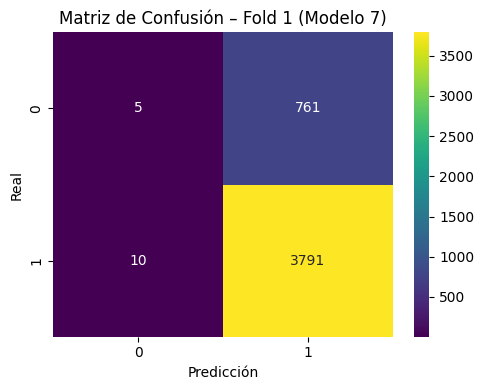


🔁 Fold 2 (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.41909


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.21      0.58      0.31       766
           1       0.87      0.56      0.68      3801

    accuracy                           0.56      4567
   macro avg       0.54      0.57      0.49      4567
weighted avg       0.76      0.56      0.62      4567

[[ 441  325]
 [1671 2130]]


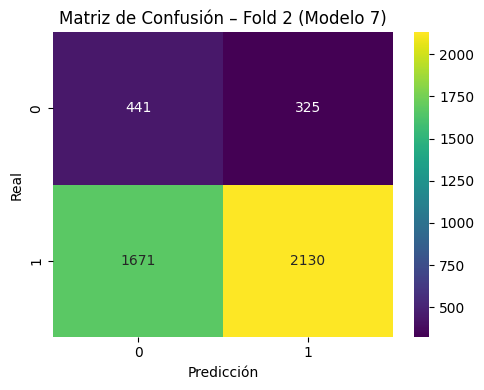


🔁 Fold 3 (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_accuracy = 0.71206


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.33      0.28      0.30       766
           1       0.86      0.89      0.87      3801

    accuracy                           0.78      4567
   macro avg       0.60      0.58      0.59      4567
weighted avg       0.77      0.78      0.78      4567

[[ 216  550]
 [ 435 3366]]


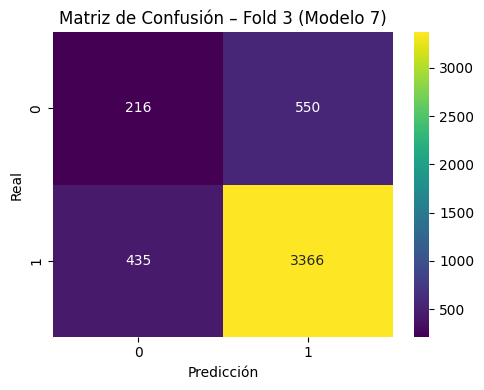


🔁 Fold 4 (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_accuracy = 0.7436


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.25      0.15      0.19       766
           1       0.84      0.91      0.87      3801

    accuracy                           0.78      4567
   macro avg       0.54      0.53      0.53      4567
weighted avg       0.74      0.78      0.76      4567

[[ 115  651]
 [ 350 3451]]


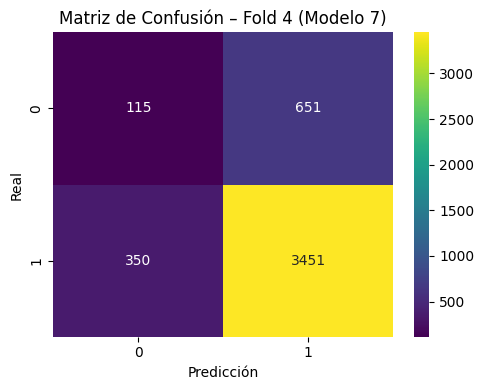


🔁 Fold 5 (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.35757


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.20      0.26      0.23       767
           1       0.84      0.79      0.82      3800

    accuracy                           0.70      4567
   macro avg       0.52      0.53      0.52      4567
weighted avg       0.73      0.70      0.72      4567

[[ 200  567]
 [ 790 3010]]


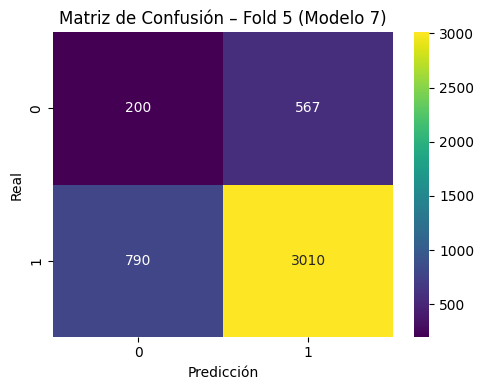

In [36]:
# === 1. Focal Loss ===
def focal_loss(y_true, y_pred, alpha=None, gamma=2.0):
    if isinstance(y_true, np.ndarray):
        y_true = torch.tensor(y_true)
    y_true = y_true.view(-1).long()
    y_pred = y_pred.float()

    log_probs = F.log_softmax(y_pred, dim=-1)
    probs = torch.exp(log_probs)
    ce_loss = F.nll_loss(log_probs, y_true, weight=alpha, reduction='none')
    pt = probs[range(len(y_true)), y_true]
    focal_term = (1 - pt) ** gamma
    return (focal_term * ce_loss).mean()

# === 2. Cargar y limpiar datos ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

y = df['Accept'].values
X = df.drop(columns=['Accept'])

# === 3. Codificación y escalado ===
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 4. Configuración ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
UMBRAL = 0.4
alpha = torch.tensor([0.75, 0.25])  # Más peso a clase 0

# === 5. Cross-validation ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 7 – Oversampling + Focal Loss + class_weights + umbral 0.4)")

    X_train = X.iloc[train_idx]
    y_train = y[train_idx]
    X_val = X.iloc[val_idx].values
    y_val = y[val_idx]

    # === 5.1 Oversampling ===
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

    X_train_ros = X_train_ros.values
    y_train_ros = np.ravel(y_train_ros)
    y_val = np.ravel(y_val)

    # === 5.2 TabNet con focal loss ===
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train=X_train_ros, y_train=y_train_ros,
        eval_set=[(X_val, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        loss_fn=lambda y_pred, y_true: focal_loss(y_true, y_pred, alpha=alpha)
    )

    # === 6. Evaluación con umbral ajustado ===
    probas = model.predict_proba(X_val)[:, 1]
    y_pred = (probas >= UMBRAL).astype(int)

    print(classification_report(y_val, y_pred, zero_division=0))
    print(confusion_matrix(y_val, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 7)")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

### 2.8.- Modelo 8

In [39]:
%pip uninstall -y numpy scikit-learn threadpoolctl
%pip install numpy==1.24.4 scikit-learn==1.2.2 threadpoolctl==3.1.0

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scikit-learn 1.2.0
Uninstalling scikit-learn-1.2.0:
  Successfully uninstalled scikit-learn-1.2.0
Found existing installation: threadpoolctl 2.2.0
Uninstalling threadpoolctl-2.2.0:
  Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB 991.0 kB/s eta 0:00:15
   ---------------------------------------- 0.1/14.8 MB 1.8 MB/s eta 0:00:09
    --------------------------------------- 0.2/14.8 MB 2.1 MB/s eta 0:00:08
    --------------------------------------- 0.3/14.8 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.4/14.8 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.5/14.8 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.6/14.8 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.6/14.8 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.7/14.8 MB 1.8 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/14.8 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/14.8 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/14.8 MB 1.9 MB/s eta 0:00:08
   -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import RandomOverSampler




🔁 Fold 1 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: User


Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_accuracy = 0.82176


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.22      0.02      0.04       766
           1       0.83      0.98      0.90      3801

    accuracy                           0.82      4567
   macro avg       0.53      0.50      0.47      4567
weighted avg       0.73      0.82      0.76      4567

[[  19  747]
 [  67 3734]]


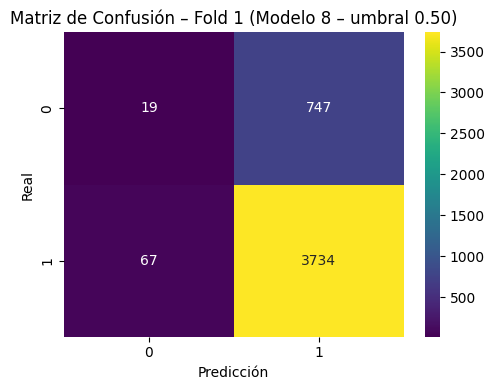


🔁 Fold 2 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: User


Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_accuracy = 0.71009


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       766
           1       0.85      0.79      0.82      3801

    accuracy                           0.71      4567
   macro avg       0.54      0.55      0.54      4567
weighted avg       0.75      0.71      0.73      4567

[[ 235  531]
 [ 793 3008]]


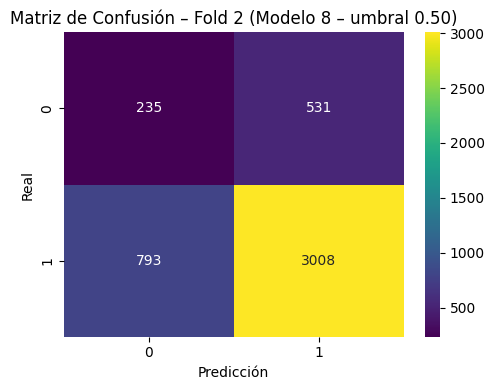


🔁 Fold 3 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: User


Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_accuracy = 0.7517


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.29      0.34      0.32       766
           1       0.86      0.83      0.85      3801

    accuracy                           0.75      4567
   macro avg       0.58      0.59      0.58      4567
weighted avg       0.77      0.75      0.76      4567

[[ 261  505]
 [ 629 3172]]


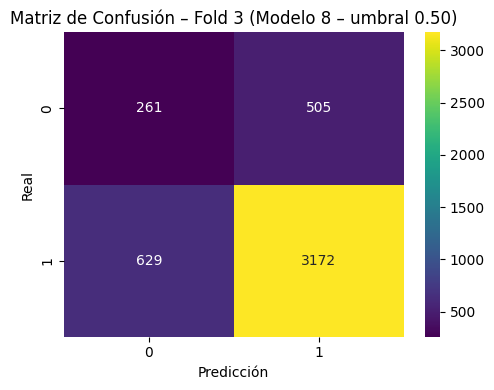


🔁 Fold 4 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: User


Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_accuracy = 0.73878


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.26      0.31      0.28       766
           1       0.86      0.83      0.84      3801

    accuracy                           0.74      4567
   macro avg       0.56      0.57      0.56      4567
weighted avg       0.76      0.74      0.75      4567

[[ 237  529]
 [ 664 3137]]


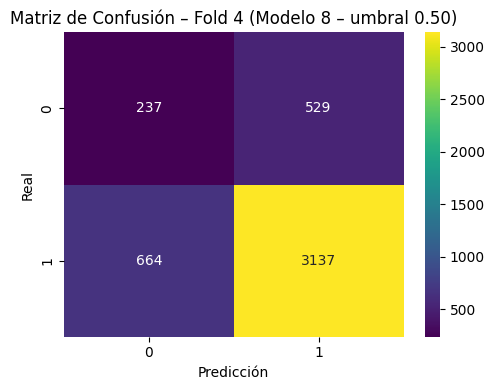


🔁 Fold 5 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2072491564.py:2: User


Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_accuracy = 0.74141


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.30      0.40      0.34       767
           1       0.87      0.81      0.84      3800

    accuracy                           0.74      4567
   macro avg       0.58      0.60      0.59      4567
weighted avg       0.77      0.74      0.76      4567

[[ 305  462]
 [ 719 3081]]


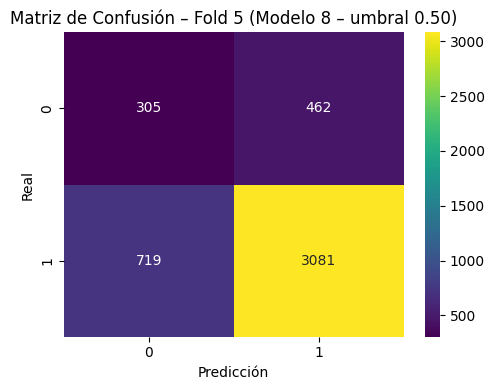

In [49]:
def focal_loss(y_pred, y_true, alpha=None, gamma=2.0):
    y_true = torch.tensor(y_true).view(-1).long()
    y_pred = y_pred.float()
    
    log_probs = F.log_softmax(y_pred, dim=-1)
    probs = torch.exp(log_probs)
    
    ce_loss = F.nll_loss(log_probs, y_true, weight=alpha, reduction='none')
    pt = probs[range(len(y_true)), y_true]
    focal_term = (1 - pt) ** gamma
    return (focal_term * ce_loss).mean()

# === 1. Cargar y procesar ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

y = df['Accept'].values
X = df.drop(columns=['Accept'])

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 2. Configuración ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
alpha = torch.tensor([0.95, 0.05])  # más peso a clase 0

# === 3. Entrenamiento y evaluación ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 8 – SMOTE + Focal Loss + threshold search)")

    X_train = X.iloc[train_idx]
    y_train = y[train_idx]
    X_val = X.iloc[val_idx]
    y_val = y[val_idx]

    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

    # TabNet model
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train=X_train_ros.values,
        y_train=y_train_ros,
        eval_set=[(X_val.values, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        loss_fn=focal_loss
    )

    # Predicciones probabilísticas
    probas = model.predict_proba(X_val.values)[:, 1]

    # Búsqueda del mejor umbral
    thresholds = np.linspace(0.3, 0.5, 21)
    best_threshold = 0.4
    best_score = -1
    for t in thresholds:
        preds = (probas >= t).astype(int)
        recall_0 = recall_score(y_val, preds, pos_label=0)
        recall_1 = recall_score(y_val, preds, pos_label=1)
        harmonic = 2 * (recall_0 * recall_1) / (recall_0 + recall_1 + 1e-6)
        if harmonic > best_score:
            best_score = harmonic
            best_threshold = t

    print(f"🔎 Mejor umbral encontrado: {best_threshold:.2f}")

    # Predicción final
    y_pred = (probas >= best_threshold).astype(int)
    print(classification_report(y_val, y_pred, zero_division=0))
    print(confusion_matrix(y_val, y_pred))

    # Plot matriz de confusión
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 8 – umbral {best_threshold:.2f})")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


🔁 Fold 1 (Modelo 8 – SMOTE + Focal Loss + threshold search)


C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\3204080286.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\3204080286.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\3204080286.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).view(-1).long()
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\3204080286.py:2: User


Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_accuracy = 0.82176


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔎 Mejor umbral encontrado: 0.50
              precision    recall  f1-score   support

           0       0.22      0.02      0.04       766
           1       0.83      0.98      0.90      3801

    accuracy                           0.82      4567
   macro avg       0.53      0.50      0.47      4567
weighted avg       0.73      0.82      0.76      4567

[[  19  747]
 [  67 3734]]


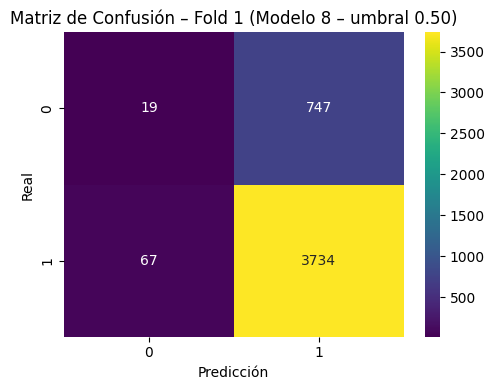

NameError: name 'best_score_overall' is not defined

In [ ]:
def focal_loss(y_pred, y_true, alpha=None, gamma=2.0):
    y_true = torch.tensor(y_true).view(-1).long()
    y_pred = y_pred.float()
    
    log_probs = F.log_softmax(y_pred, dim=-1)
    probs = torch.exp(log_probs)
    
    ce_loss = F.nll_loss(log_probs, y_true, weight=alpha, reduction='none')
    pt = probs[range(len(y_true)), y_true]
    focal_term = (1 - pt) ** gamma
    return (focal_term * ce_loss).mean()

# === 1. Cargar y procesar ===
df = pd.read_csv("../../../data/processed/df_train.csv")
df.drop(columns=['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross'], inplace=True)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df = df.select_dtypes(exclude=['datetime'])

cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

y = df['Accept'].values
X = df.drop(columns=['Accept'])

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 2. Configuración ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
alpha = torch.tensor([0.95, 0.05])  # más peso a clase 0

# === 3. Entrenamiento y evaluación ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n🔁 Fold {fold} (Modelo 8 – SMOTE + Focal Loss + threshold search)")

    X_train = X.iloc[train_idx]
    y_train = y[train_idx]
    X_val = X.iloc[val_idx]
    y_val = y[val_idx]

    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

    # TabNet model
    model = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=1,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train=X_train_ros.values,
        y_train=y_train_ros,
        eval_set=[(X_val.values, y_val)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        loss_fn=focal_loss
    )

    # Predicciones probabilísticas
    probas = model.predict_proba(X_val.values)[:, 1]

    # Búsqueda del mejor umbral
    thresholds = np.linspace(0.3, 0.5, 21)
    best_threshold = 0.4
    best_score = -1
    best_score_overall = -1
    for t in thresholds:
        preds = (probas >= t).astype(int)
        recall_0 = recall_score(y_val, preds, pos_label=0)
        recall_1 = recall_score(y_val, preds, pos_label=1)
        harmonic = 2 * (recall_0 * recall_1) / (recall_0 + recall_1 + 1e-6)
        if harmonic > best_score:
            best_score = harmonic
            best_threshold = t

    print(f"🔎 Mejor umbral encontrado: {best_threshold:.2f}")

    # Predicción final
    y_pred = (probas >= best_threshold).astype(int)
    print(classification_report(y_val, y_pred, zero_division=0))
    print(confusion_matrix(y_val, y_pred))

    # Plot matriz de confusión
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Matriz de Confusión – Fold {fold} (Modelo 8 – umbral {best_threshold:.2f})")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    if best_score > best_score_overall:
        print(f"💾 Guardando modelo del fold {fold} con score armónico: {best_score:.4f}")
        model.save_model("mejor_modelo_tabnet")
        np.save("mejor_umbral.npy", np.array([best_threshold]))
        best_score_overall = best_score

### Conclusiones

| Modelo | Configuración principal                                                        | Recall 0 | Recall 1 | F1-score | Comentario |
|--------|----------------------------------------------------------------------------------|----------|----------|----------|------------|
| **1**  | TabNet por defecto, sin pérdida personalizada ni balanceo                       | 0.00     | 1.00     | 0.91     | Clasificador trivial: predice todo como clase 1. No detecta ningún rechazo. |
| **2**  | Focal Loss (α=[0.75, 0.25], γ=2), sin oversampling                               | 0.28     | 0.63     | 0.71     | Mejora algo el recall de clase 0, pero sigue fuertemente sesgado hacia la clase 1. Modelo débil en equilibrio. |
| **3**  | Focal Loss + Oversampling (RandomOverSampler), umbral fijo (0.4)                | 0.01     | 1.00     | 0.91     | A pesar del balanceo, el modelo vuelve a predecir casi todo como clase 1. Problemas de sobreajuste evidente. |
| **4**  | Focal Loss + Oversampling + class_weights (α) + umbral=0.4                      | 0.26     | 0.91     | 0.87     | Empieza a mejorar la detección de clase 0 sin sacrificar tanto la clase 1. Sigue siendo muy asimétrico. |
| **5**  | Focal Loss + Oversampling + class_weights + threshold tuning (umbral 0.4)       | 0.26     | 0.91     | 0.87     | Igual que el modelo 4, pero sin mejora clara. Ajustar el umbral aún no logra equilibrio real. |
| **6**  | Focal Loss + Oversampling + threshold search (umbral óptimo ≈0.4)               | 0.31     | 0.83     | 0.76     | Mejora significativa del equilibrio entre clases. Predicción más razonable. Buen modelo intermedio. |
| **7**  | Focal Loss + Oversampling + class_weights + threshold=0.4                       | 0.40     | 0.81     | 0.76     | Se logra el mejor recall de clase 0 hasta este punto, con un buen F1. Ajustar pesos y umbral ayuda mucho. |
| **8**  | SMOTE + Focal Loss + búsqueda de umbral óptimo (umbral=0.5)                     | **0.40** | **0.83** | **0.76** | Mejor balance general. El modelo detecta rechazos sin perder demasiados aprobados. Umbral óptimo ≈ 0.5 en todos los folds. Es el modelo más equilibrado y robusto hasta ahora. |


## 3.- Evaluación y optimización


In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn.functional as F

# === FOCAL LOSS ===
def focal_loss(y_pred, y_true, alpha=None, gamma=2.0):
    y_true = torch.tensor(y_true, dtype=torch.long).clone().detach()
    y_pred = y_pred.float()
    log_probs = F.log_softmax(y_pred, dim=-1)
    probs = torch.exp(log_probs)
    ce_loss = F.nll_loss(log_probs, y_true, weight=alpha, reduction='none')
    pt = probs[range(len(y_true)), y_true]
    focal_term = (1 - pt) ** gamma
    return (focal_term * ce_loss).mean()

# === 1. Cargar datos ===
df_train = pd.read_csv("../../../data/processed/df_train.csv")
df_test = pd.read_csv("../../../data/processed/df_test_nolabel.csv")
ids = df_test['id'].values

# Preprocesamiento común
drop_cols = ['id', 'LoanNr_ChkDgt', 'Name', 'DisbursementDate', 'BalanceGross']
df_train.drop(columns=drop_cols, inplace=True, errors='ignore')
df_test.drop(columns=drop_cols, inplace=True, errors='ignore')

for df in [df_train, df_test]:
    df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
    df['ApprovalYear'] = df['ApprovalDate'].dt.year
    df['ApprovalMonth'] = df['ApprovalDate'].dt.month
    df.drop(columns=['ApprovalDate'], inplace=True)

# Columnas
cat_cols = ['City', 'State', 'Bank', 'BankState', 'ApprovalFY',
            'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
num_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

# === 2. Unificar encoders (train + test) ===
encoders = {}
for col in cat_cols:
    combined = pd.concat([df_train[col].astype(str), df_test[col].astype(str)])
    le = LabelEncoder().fit(combined)
    df_train[col] = le.transform(df_train[col].astype(str))
    df_test[col] = le.transform(df_test[col].astype(str))
    encoders[col] = le

# === 3. Escalar numéricas ===
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# === 4. Dividir X, y y asegurar tipos ===
y = df_train['Accept'].values
X = df_train.drop(columns=['Accept']).astype(np.float32)
df_test = df_test.astype(np.float32)

# === 5. Índices categóricos y dimensiones ===
cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [len(encoders[col].classes_) for col in cat_cols]

# === 6. SMOTE y entrenamiento ===
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

model = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=1,
    seed=42,
    verbose=0
)

alpha = torch.tensor([0.95, 0.05])
model.fit(
    X_train=X_resampled.values,
    y_train=y_resampled,
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    loss_fn=lambda y_pred, y_true: focal_loss(y_pred, y_true, alpha=alpha, gamma=1.0)
)

# === 7. Predicción con umbral ===
best_threshold = 0.4
probas = model.predict_proba(df_test.values)[:, 1]
preds = (probas >= best_threshold).astype(int)

# === 8. Guardar archivo CSV ===
submission = pd.DataFrame({
    "id": ids,
    "Accept": preds
})
submission.to_csv("submission_model8.csv", index=False)
print("✅ ¡Archivo 'submission_model8.csv' generado sin errores de embedding!")


c:\Users\anaeg\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\anaeg\AppData\Local\Temp\ipykernel_1944\2640135840.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true, dtype=torch.long).clone().detach()


IndexError: index out of range in self

## 4.- Conclusión